In [1]:
import os

from GAN import GAN
from utils import show_all_variables
from utils import load_cifar10_with_validation

import tensorflow as tf
import argparse
import numpy as np
import matplotlib.pyplot as plt
from utils import load_cifar10_with_validation
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2

sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
gan = GAN(sess, epoch=500, batch_size=100, dataset_name='cifar10', checkpoint_dir='checkpoint', result_dir='results', log_dir='logs', directory='./train', reuse=True)
gan.build_model()
gan.load_model()

samples = gan.sample()

c:\users\d065042\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


./train\data_batch_1
load_cifar10 for temp shape: (10000, 32, 32, 3) (10000,)
load_cifar10 for len: 10000 10000
load_cifar10 for shape: (10000, 32, 32, 3) (10000,)
./train\data_batch_2
load_cifar10 for temp shape: (10000, 32, 32, 3) (10000,)
load_cifar10 for len: 20000 20000
load_cifar10 for shape: (20000, 32, 32, 3) (20000,)
./train\data_batch_3
load_cifar10 for temp shape: (10000, 32, 32, 3) (10000,)
load_cifar10 for len: 30000 30000
load_cifar10 for shape: (30000, 32, 32, 3) (30000,)
./train\data_batch_4
load_cifar10 for temp shape: (10000, 32, 32, 3) (10000,)
load_cifar10 for len: 40000 40000
load_cifar10 for shape: (40000, 32, 32, 3) (40000,)
./train\data_batch_5
load_cifar10 for temp shape: (10000, 32, 32, 3) (10000,)
load_cifar10 for len: 50000 50000
load_cifar10 for shape: (50000, 32, 32, 3) (50000,)
./train\test_batch
load_cifar10 for temp shape: (10000, 32, 32, 3) (10000,)
load_cifar10 for len: 60000 60000
load_cifar10 for shape: (60000, 32, 32, 3) (60000,)
###########
6000
5

In [2]:
samples

array([[[[ 7.04147527e-03,  6.38253614e-03,  6.37587951e-03],
         [ 6.48979750e-03,  5.65208914e-03,  5.33230510e-03],
         [ 6.38325140e-03,  4.91249561e-03,  5.15640993e-03],
         ...,
         [-7.81356636e-03, -4.68675746e-03, -3.52203916e-03],
         [-6.73329923e-03, -5.75216021e-03, -5.36932936e-03],
         [-7.86016881e-03, -6.64183963e-03, -5.31038363e-03]],

        [[ 7.71701988e-03,  7.35845743e-03,  6.37051277e-03],
         [ 6.67129830e-03,  5.41470200e-03,  4.81824484e-03],
         [ 6.55371370e-03,  5.66209480e-03,  4.68680775e-03],
         ...,
         [-7.07827415e-03, -4.75327158e-03, -4.08431794e-03],
         [-7.81316590e-03, -4.14432446e-03, -3.89630441e-03],
         [-7.05353217e-03, -6.07536687e-03, -3.40452907e-03]],

        [[ 7.42055243e-03,  6.69429125e-03,  6.36347104e-03],
         [ 7.00981636e-03,  6.10949984e-03,  5.02120657e-03],
         [ 6.57603191e-03,  5.13066072e-03,  3.66110634e-03],
         ...,
         [-6.88973535e-0

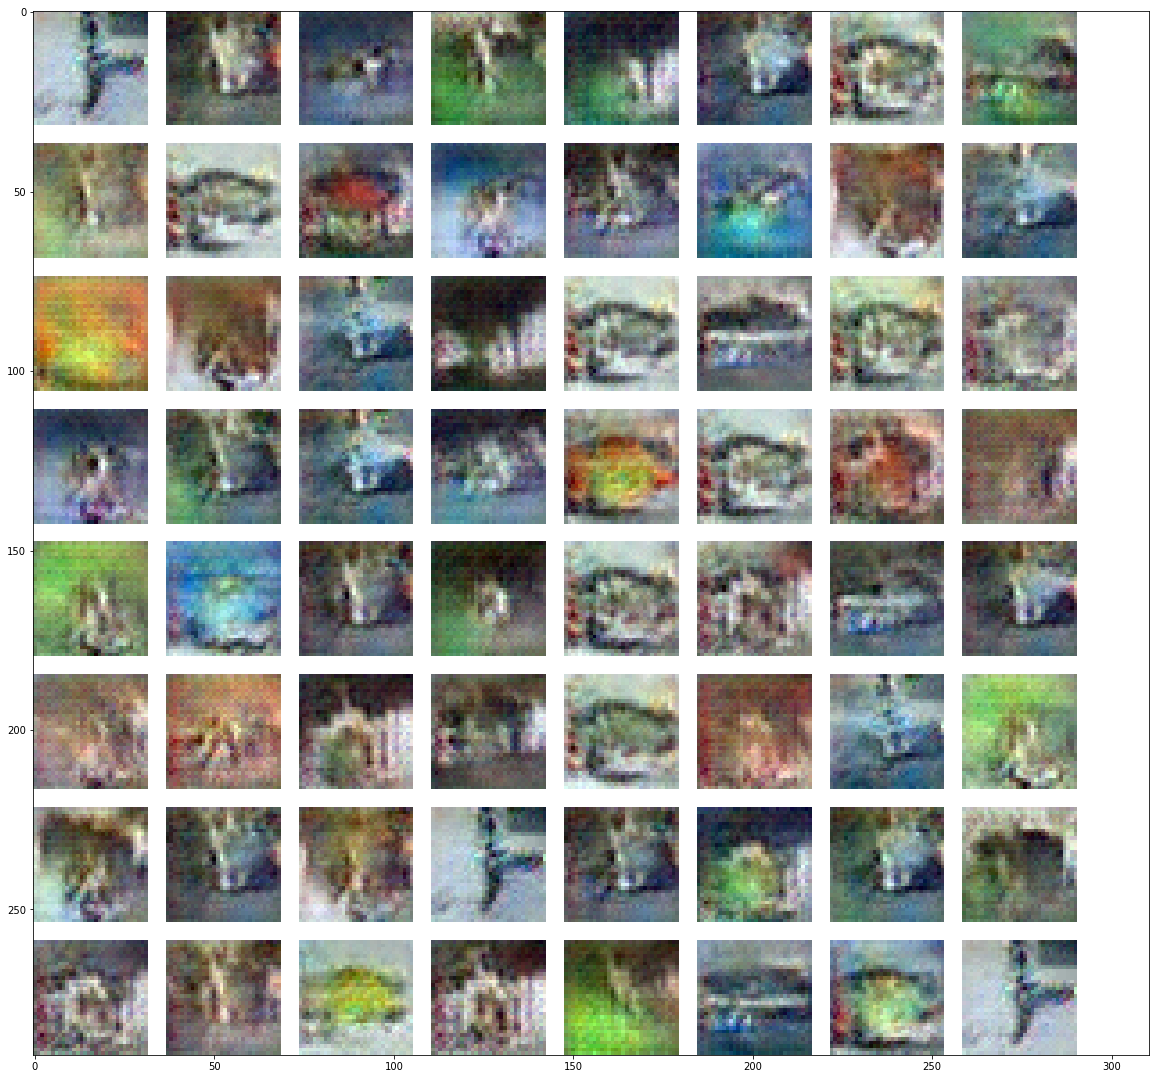

In [5]:
save_img(samples, [8,8], sides=20)

In [4]:
def save_img(images, size, pad=5, sides=20):

    figure = np.ones((32 * size[0] + (size[0]-1)*pad, 32 * size[1] + (size[1]-1)*pad + sides, 3))

    for i in range(size[0]):
        for j in range(size[1]):
            idx = i*size[0]+j
            vMin = np.amin(images[idx])
            vMax = np.amax(images[idx])
            img_arr = images[idx].reshape(32*32*3,1) # flatten
            for k, v in enumerate(img_arr):
                img_arr[k] = (v-vMin)/(vMax-vMin)
            img_arr = img_arr.reshape(32,32,3) # M*N*3
            figure[i * 32 + i*pad: (i + 1) * 32 + i*pad,j * 32 + j*pad: (j + 1) * 32+ j*pad] = img_arr

    plt.figure(figsize=(20, 20))
    plt.imshow(figure)
    plt.imsave('gan_cifar-10.png',figure)
    plt.show()